In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib;
import numpy as np
import random
import math
import skfuzzy as fuzz
from tqdm import tqdm_notebook
from environment import *
from experiment import *

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
SIM_NUM = 10000
RATE = 0.15
TRUST_UPDATE = 100
PEER_NUM = 1000
PRE_TRUSTED_RATE = 0.05
MIN_CAT_PEER_RATE = 0.05
CATS_NUM = 10

In [3]:
x_tr = np.linspace(0, 1, 11)

In [4]:
tr_v_bad = fuzz.trapmf(x_tr, [0., 0., 0.1, 0.2])
tr_bad = fuzz.trapmf(x_tr, [0.1, 0.2, 0.4, 0.5])
tr_norm = fuzz.trapmf(x_tr, [0.4, 0.5, 0.6, 0.7])
tr_good = fuzz.trapmf(x_tr, [0.6, 0.7, 0.8, 0.9])
tr_v_good = fuzz.trapmf(x_tr, [0.8, 0.9, 1., 1.])

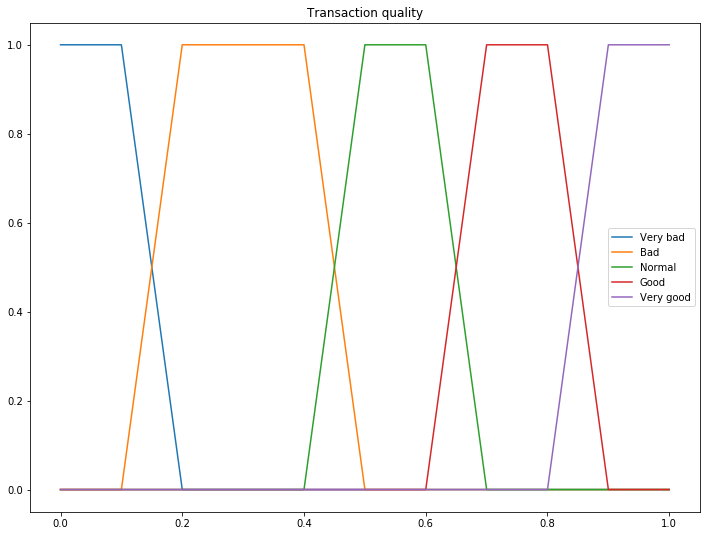

In [5]:
plt.figure(figsize=(12,9))
plt.plot(x_tr, tr_v_bad, linewidth=1.5, label='Very bad')
plt.plot(x_tr, tr_bad, linewidth=1.5, label='Bad')
plt.plot(x_tr, tr_norm, linewidth=1.5, label='Normal')
plt.plot(x_tr, tr_good, linewidth=1.5, label='Good')
plt.plot(x_tr, tr_v_good, linewidth=1.5, label='Very good')
plt.title('Transaction quality')
plt.legend(loc='right')
plt.savefig('mbfs.png', bbox_inches='tight')
plt.show()

In [3]:
def convert_type2(t):
    return np.array([t[0], t[2], t[3], t[5]]), np.array([t[1], t[2], t[3], t[4]])

def trapmf2(t, x_tr=np.linspace(0, 1, 11)):
    t1, t2 = convert_type2(t)
    return fuzz.trapmf(x_tr, t1), fuzz.trapmf(x_tr, t2)

In [19]:
x_tr_2 = np.array([0., 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 1.])
tr_v_bad_2 = trapmf2(x_tr=x_tr_2, t=np.array([0., 0., 0., 0.1, 0.2, 0.3]))
tr_bad_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.05, 0.15, 0.2, 0.4, 0.45, 0.5]))
tr_norm_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.3, 0.4, 0.5, 0.6, 0.65, 0.75]))
tr_good_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.55, 0.65, 0.7, 0.8, 0.85, 0.9]))
tr_v_good_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.8, 0.85, 0.9, 1., 1., 1.]))

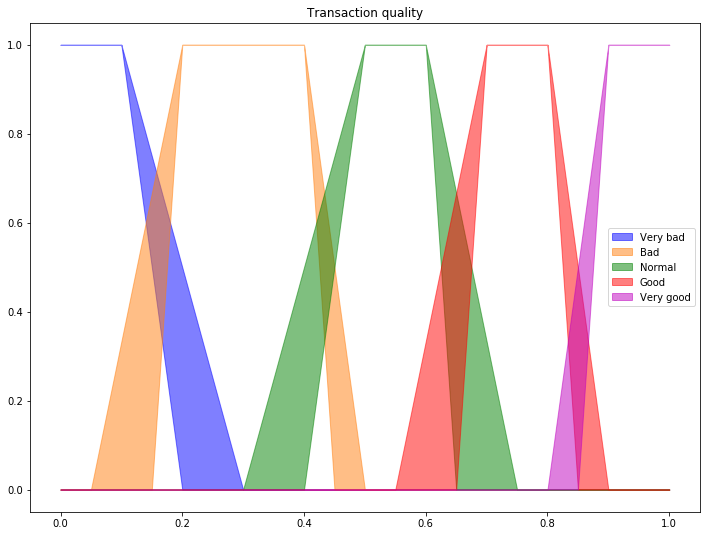

In [22]:
plt.figure(figsize=(12,9))
plt.fill_between(x_tr_2, tr_v_bad_2[0], tr_v_bad_2[1], color='b', alpha=0.5, label='Very bad')
plt.fill_between(x_tr_2, tr_bad_2[0], tr_bad_2[1], color='C1', alpha=0.5, label='Bad')
plt.fill_between(x_tr_2, tr_norm_2[0], tr_norm_2[1], color='g', alpha=0.5, label='Normal')
plt.fill_between(x_tr_2, tr_good_2[0], tr_good_2[1], color='r', alpha=0.5, label='Good')
plt.fill_between(x_tr_2, tr_v_good_2[0], tr_v_good_2[1], color='m', alpha=0.5, label='Very good')
plt.title('Transaction quality')
plt.legend(loc='right')
plt.savefig('mbfs_type_2', bbox_inches='tight')
plt.show()

In [4]:
def malicious_rate_exp(rates):
    res_dict = {'rates': rates, 'simple': [], 'eigen': [], 'honest': [], 'peer': [], 'abs': [], 'peer_eigen': [], 'peer_fuzzy': []}
    for rate in rates:
        simple = SimpleEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                           num_cats=CATS_NUM)
        simple.simulate(SIM_NUM)
        res_dict['simple'].append(count_stat(simple.interactions))

        eigen = EigenTrustEnv(num_peers=PEER_NUM, malicious_rate=rate, pre_trusted_rate=PRE_TRUSTED_RATE,
                              min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        eigen.simulate(SIM_NUM)
        res_dict['eigen'].append(count_stat(eigen.interactions))

        peer = PeerTrustEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                            num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer.simulate(SIM_NUM)
        res_dict['peer'].append(count_stat(peer.interactions))

        absolute = AbsoluteTrustEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                    num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        absolute.simulate(SIM_NUM)
        res_dict['abs'].append(count_stat(absolute.interactions))
        
        peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                            num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_fuzzy.simulate(SIM_NUM)
        res_dict['peer_fuzzy'].append(count_stat(peer_fuzzy.interactions))
        
        peer_eigen = PeerEigenTrustEnv(num_peers=PEER_NUM, malicious_rate=rate, pre_trusted_rate=PRE_TRUSTED_RATE,
                              min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_eigen.simulate(SIM_NUM)
        res_dict['peer_eigen'].append(count_stat(peer_eigen.interactions))
        print(f'Rate {rate:.3f} completed!')

    return res_dict


def convergence_exp(nums):
    res_dict = {'nums': nums, 'simple': [], 'eigen': [], 'honest': [], 'peer': [], 'abs': [], 'peer_eigen': [], 'peer_fuzzy': []}
    for num in nums:
        eigen = EigenTrustEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                              min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        eigen.simulate(SIM_NUM)
        res_dict['eigen'].append(np.mean(eigen.convergence))
        print(eigen.convergence)

        peer = PeerTrustEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                            num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer.simulate(SIM_NUM)
        res_dict['peer'].append(np.mean(peer.convergence))
        print(peer.convergence)

        absolute = AbsoluteTrustEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                    num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        absolute.simulate(SIM_NUM)
        res_dict['abs'].append(np.mean(absolute.convergence))
        print(absolute.convergence)
        
        peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                            num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_fuzzy.simulate(SIM_NUM)
        res_dict['peer_fuzzy'].append(np.mean(peer_fuzzy.convergence))
        print(peer_fuzzy.convergence)
        
        peer_eigen = PeerEigenTrustEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                              min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_eigen.simulate(SIM_NUM)
        res_dict['peer_eigen'].append(np.mean(peer_eigen.convergence))
        print(peer_eigen.convergence)
        print(f'Num {num} completed!')

    return res_dict

def robustness_exp(nums):
    res_dict = {'nums': nums, 'simple': [], 'eigen': [], 'honest': [], 'peer': [], 'abs': [], 'peer_eigen': [], 'peer_fuzzy': []}
    for num in nums:
        simple = SimpleEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                           num_cats=CATS_NUM)
        simple.simulate(SIM_NUM)
        res_dict['simple'].append(count_stat(simple.interactions))

        eigen = EigenTrustEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                              min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        eigen.simulate(SIM_NUM)
        res_dict['eigen'].append(count_stat(eigen.interactions))

        peer = PeerTrustEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                            num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer.simulate(SIM_NUM)
        res_dict['peer'].append(count_stat(peer.interactions))

        absolute = AbsoluteTrustEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                    num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        absolute.simulate(SIM_NUM)
        res_dict['abs'].append(count_stat(absolute.interactions))
        
        peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                            num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_fuzzy.simulate(SIM_NUM)
        res_dict['peer_fuzzy'].append(count_stat(peer_fuzzy.interactions))
        
        peer_eigen = PeerEigenTrustEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                              min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_eigen.simulate(SIM_NUM)
        res_dict['peer_eigen'].append(count_stat(peer_eigen.interactions))
        
        print(f'Num {num} completed!')

    return res_dict


def plot_convergence_exp(res_dict):
    plt.figure(figsize=(12,9))
    plt.plot(res_dict['nums'], res_dict['eigen'], 'C1-o', label='EigenTrust')
#     plt.plot(res_dict['nums'], res_dict['honest'], 'g-o', label='HonestPeer')
    plt.plot(res_dict['nums'], res_dict['peer'], 'r-o', label='PeerTrust', alpha=0.3)
#     plt.plot(res_dict['nums'], res_dict['abs'], 'm-o', label='AbsoluteTrust')
    plt.plot(res_dict['nums'], res_dict['peer_fuzzy'], 'y-o', label='Fuzzy PeerTrust')
#     plt.plot(res_dict['nums'], res_dict['peer_eigen'], 'c-o', label='PeerEigenTrust')
    plt.title('Speed of convergence')
    plt.xlabel('# of peers')
    plt.ylabel('# of iterations')
    plt.ylim(1, 5)
    plt.legend()
    plt.savefig('conv_2_with_fuzzy.png', bbox_inches='tight')
    plt.show()
    
def plot_robust_exp(res_dict):
    plt.figure(figsize=(12,9))
#     plt.plot(res_dict['nums'], res_dict['simple'], 'b-o', label='Simple')
    plt.plot(res_dict['nums'], res_dict['eigen'], 'C1-o', label='EigenTrust')
#     plt.plot(res_dict['nums'], res_dict['honest'], 'g-o', label='HonestPeer')
    plt.plot(res_dict['nums'], res_dict['peer'], 'r-o', label='PeerTrust')
#     plt.plot(res_dict['nums'], res_dict['abs'], 'm-o', label='AbsoluteTrust')
    plt.plot(res_dict['nums'], res_dict['peer_fuzzy'], 'y-o', label='Fuzzy PeerTrust')
#     plt.plot(res_dict['nums'], res_dict['peer_eigen'], 'c-o', label='PeerEigenTrust')
    plt.title('Robustness of reputation systems')
    plt.xlabel('# of peers')
    plt.ylabel('Rate of unsuccessful transactions')
    plt.ylim(0, 0.16)
    plt.legend()
    plt.savefig('robust_3_with_fuzzy.png', bbox_inches='tight')
    plt.show()
    
def plot_malicious_rate_exp(res_dict):
    plt.figure(figsize=(12,9))
    plt.plot(res_dict['rates'] * 100, res_dict['simple'], 'b-o', label='Simple')
    plt.plot(res_dict['rates'] * 100, res_dict['eigen'], 'C1-o', label='EigenTrust')
    plt.plot(res_dict['rates'] * 100, res_dict['honest'], 'g-o', label='HonestPeer')
    plt.plot(res_dict['rates'] * 100, res_dict['peer'], 'r-o', label='PeerTrust')
    plt.plot(res_dict['rates'] * 100, res_dict['abs'], 'm-o', label='AbsoluteTrust')
#     plt.plot(res_dict['rates'] * 100, res_dict['peer_fuzzy'], 'y-o', label='Fuzzy PeerTrust')
#     plt.plot(res_dict['rates'] * 100, res_dict['peer_eigen'], 'c-o', label='PeerEigenTrust')
    plt.title('Robustness of reputation systems')
    plt.xlabel('% of malicious peers')
    plt.ylabel('Rate of unsuccessful transactions')
    plt.ylim(0, 0.4)
    plt.legend()
    plt.savefig('robust_2_with_fuzzy.png', bbox_inches='tight')
    plt.show()

In [8]:
def defuzz_exp(methods):
    res = []
    for method in methods:
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE, defuzz_method=method)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res.append((np.mean(t), np.std(t)))
        print(f'Method {method} completed!')

    return res

def defuzz_malicious_rate_exp(rates):
    res_dict = {'rates': rates, 'centroid': [], 'bisector': [], 'mom': [], 'som': [], 'lom': []}
    for rate in rates:
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='centroid', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['centroid'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='bisector', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['bisector'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='mom', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['mom'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='som', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['som'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='lom', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['lom'].append(np.mean(t))
        
        print(f'Rate {rate:.3f} completed!')

    return res_dict

def defuzz_robustness_exp(nums):
    res_dict = {'nums': nums, 'centroid': [], 'bisector': [], 'mom': [], 'som': [], 'lom': []}
    for num in nums:
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='centroid', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['centroid'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='bisector', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['bisector'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='mom', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['mom'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='som', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['som'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                defuzz_method='lom', num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['lom'].append(np.mean(t))
        
        print(f'Num {num} completed!')

    return res_dict

def malicious_rate_exp_2(rates):
    res_dict = {'rates': rates, 'simple': [], 'eigen': [], 'honest': [], 'peer': [], 'abs': [], 'peer_eigen': [], 'peer_fuzzy': [], 'peer_fuzzy_2': []}
    for rate in rates:
        t = []
        for i in range(5):
            simple = SimpleEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                               num_cats=CATS_NUM)
            simple.simulate(SIM_NUM)
            t.append(count_stat(simple.interactions))
        res_dict['simple'].append(np.mean(t))
        
        t = []
        for i in range(5):
            eigen = EigenTrustEnv(num_peers=PEER_NUM, malicious_rate=rate, pre_trusted_rate=PRE_TRUSTED_RATE,
                                  min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            eigen.simulate(SIM_NUM)
            t.append(count_stat(eigen.interactions))
        res_dict['eigen'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer = PeerTrustEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer.simulate(SIM_NUM)
            t.append(count_stat(peer.interactions))
        res_dict['peer'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE, fuzz_type=1, defuzz_method='som')
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['peer_fuzzy'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy_2 = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE, fuzz_type=2, defuzz_method='som')
            peer_fuzzy_2.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy_2.interactions))
        res_dict['peer_fuzzy_2'].append(np.mean(t))
        
        print(f'Rate {rate:.3f} completed!')

    return res_dict

def robustness_exp_2(nums):
    res_dict = {'nums': nums, 'simple': [], 'eigen': [], 'honest': [], 'peer': [], 'abs': [], 'peer_eigen': [], 'peer_fuzzy': [], 'peer_fuzzy_2': []}
    for num in nums:
        t = []
        for i in range(5):
            simple = SimpleEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                               num_cats=CATS_NUM)
            simple.simulate(SIM_NUM)
            t.append(count_stat(simple.interactions))
        res_dict['simple'].append(np.mean(t))
        
        t = []
        for i in range(5):
            eigen = EigenTrustEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                                  min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            eigen.simulate(SIM_NUM)
            t.append(count_stat(eigen.interactions))
        res_dict['eigen'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer = PeerTrustEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
            peer.simulate(SIM_NUM)
            t.append(count_stat(peer.interactions))
        res_dict['peer'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE, fuzz_type=1, defuzz_method='som')
            peer_fuzzy.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy.interactions))
        res_dict['peer_fuzzy'].append(np.mean(t))
        
        t = []
        for i in range(5):
            peer_fuzzy_2 = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE,
                                num_cats=CATS_NUM, trust_upd=TRUST_UPDATE, fuzz_type=2, defuzz_method='som')
            peer_fuzzy_2.simulate(SIM_NUM)
            t.append(count_stat(peer_fuzzy_2.interactions))
        res_dict['peer_fuzzy_2'].append(np.mean(t))
        
        print(f'Num {num} completed!')

    return res_dict

def plot_malicious_rate_exp_2(res_dict):
    plt.figure(figsize=(12,9))
    plt.plot(res_dict['rates'] * 100, res_dict['simple'], 'b-o', label='Simple')
    plt.plot(res_dict['rates'] * 100, res_dict['eigen'], 'C1-o', label='EigenTrust')
    plt.plot(res_dict['rates'] * 100, res_dict['peer'], 'r-o', label='PeerTrust')
    plt.plot(res_dict['rates'] * 100, res_dict['peer_fuzzy'], 'g-o', label='Fuzzy PeerTrust')
    plt.plot(res_dict['rates'] * 100, res_dict['peer_fuzzy_2'], 'm-o', label='Fuzzy Type-2 PeerTrust')
    plt.title('Robustness of reputation systems')
    plt.xlabel('% of malicious peers')
    plt.ylabel('Rate of unsuccessful transactions')
    plt.ylim(0, 0.4)
    plt.legend()
    plt.savefig('robust_with_type_2_fuzzy.png', bbox_inches='tight')
    plt.show()
    
def plot_robust_exp_2(res_dict):
    plt.figure(figsize=(12,9))
    plt.plot(res_dict['nums'], res_dict['eigen'], 'C1-o', label='EigenTrust')
    plt.plot(res_dict['nums'], res_dict['peer'], 'r-o', label='PeerTrust')
    plt.plot(res_dict['nums'], res_dict['peer_fuzzy'], 'g-o', label='Fuzzy PeerTrust')
    plt.plot(res_dict['nums'], res_dict['peer_fuzzy_2'], 'm-o', label='Fuzzy Type-2 PeerTrust')
    plt.title('Robustness of reputation systems')
    plt.xlabel('# of peers')
    plt.ylabel('Rate of unsuccessful transactions')
    plt.ylim(0, 0.16)
    plt.legend()
    plt.savefig('robust_exp_with_type_2_fuzzy.png', bbox_inches='tight')
    plt.show()

def plot_defuzz_exp(methods, res):
    perf = [x[0] for x in res]
    errs = [x[1] for x in res]
    y_pos = np.arange(len(methods))
    plt.figure(figsize=(12,9))
    plt.bar(y_pos, perf, yerr=errs, align='center', alpha=0.5)
    plt.title('Robustness of defuzzification methods')
    plt.xticks(y_pos, methods)
    plt.ylabel('Rate of unsuccessful transactions')
    plt.savefig('defuzz_methods_1.png', bbox_inches='tight')
    plt.show()
    
def plot_defuzz_malicious_rate_exp(res_dict):
    plt.figure(figsize=(12,9))
    plt.plot(res_dict['rates'] * 100, res_dict['centroid'], 'b-o', label='centroid')
    plt.plot(res_dict['rates'] * 100, res_dict['bisector'], 'C1-o', label='bisector')
    plt.plot(res_dict['rates'] * 100, res_dict['mom'], 'g-o', label='mom')
    plt.plot(res_dict['rates'] * 100, res_dict['som'], 'r-o', label='som')
    plt.plot(res_dict['rates'] * 100, res_dict['lom'], 'm-o', label='lom')
    plt.title('Robustness of fuzzy reputation systems')
    plt.xlabel('% of malicious peers')
    plt.ylabel('Rate of unsuccessful transactions')
    plt.ylim(0, 0.4)
    plt.legend()
    plt.savefig('robust_1_defuzz_methods.png', bbox_inches='tight')
    plt.show()
    
def plot_defuzz_robust_exp(res_dict):
    plt.figure(figsize=(12,9))
    plt.plot(res_dict['nums'], res_dict['centroid'], 'b-o', label='centroid')
    plt.plot(res_dict['nums'], res_dict['bisector'], 'C1-o', label='bisector')
    plt.plot(res_dict['nums'], res_dict['mom'], 'g-o', label='mom')
    plt.plot(res_dict['nums'], res_dict['som'], 'r-o', label='som')
    plt.plot(res_dict['nums'], res_dict['lom'], 'm-o', label='lom')
    plt.title('Robustness of fuzzy reputation systems')
    plt.xlabel('# of peers')
    plt.ylabel('Rate of unsuccessful transactions')
    plt.ylim(0, 0.16)
    plt.legend()
    plt.savefig('robust_defuzz_methods.png', bbox_inches='tight')
    plt.show()

In [6]:
methods = ['centroid', 'bisector', 'mom', 'som', 'lom']

In [20]:
res = defuzz_exp(methods)


Method centroid completed!



Method bisector completed!



Method mom completed!



Method som completed!



Method lom completed!


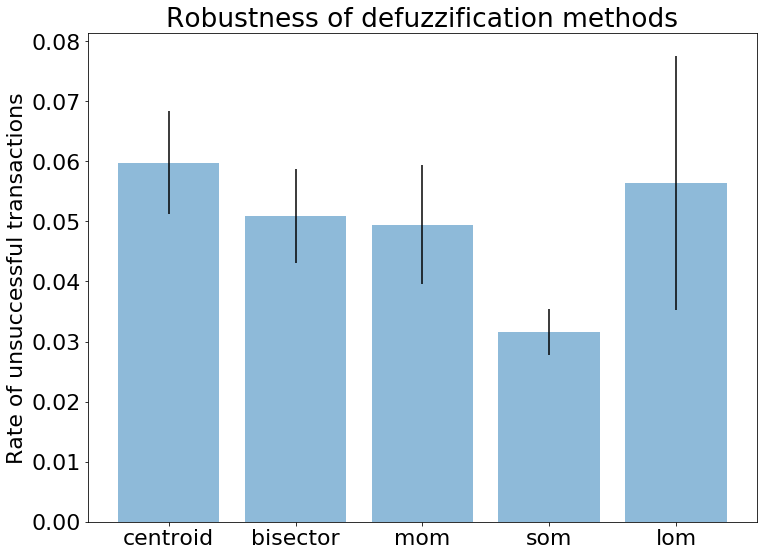

In [23]:
plot_defuzz_exp(methods, res)

In [7]:
rates = np.arange(0.1, 0.36, 0.025)
res_dict = defuzz_malicious_rate_exp(rates)

KeyboardInterrupt: 

In [34]:
plot_defuzz_malicious_rate_exp(res_dict)

KeyError: 'rates'

<Figure size 864x648 with 0 Axes>

In [31]:
nums = np.arange(1000, 3501, 500)
res_dict = defuzz_robustness_exp(nums)


Num 1000 completed!



Num 1500 completed!



Num 2000 completed!



Num 2500 completed!



Num 3000 completed!



Num 3500 completed!


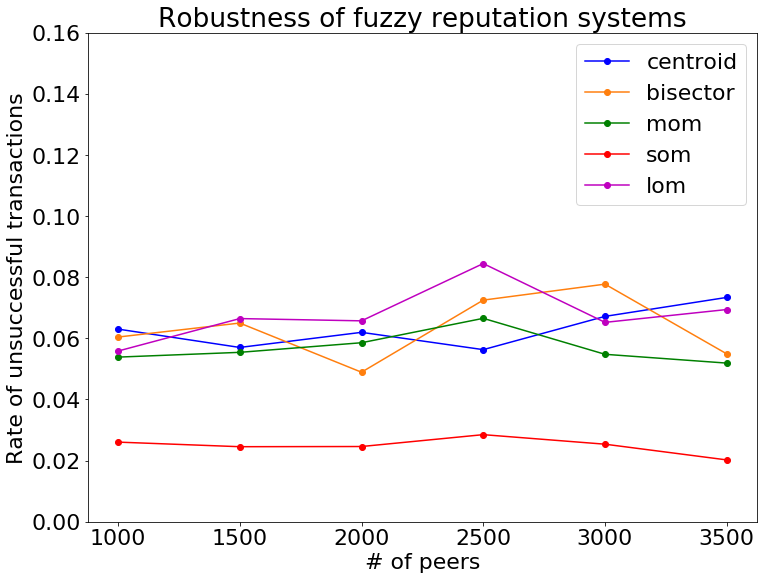

In [37]:
plot_defuzz_robust_exp(res_dict)

In [19]:
nums = np.arange(1000, 3501, 500)
res_dict = robustness_exp_2(nums)


Num 1000 completed!



Num 1500 completed!



Num 2000 completed!



Num 2500 completed!



Num 3000 completed!



Num 3500 completed!


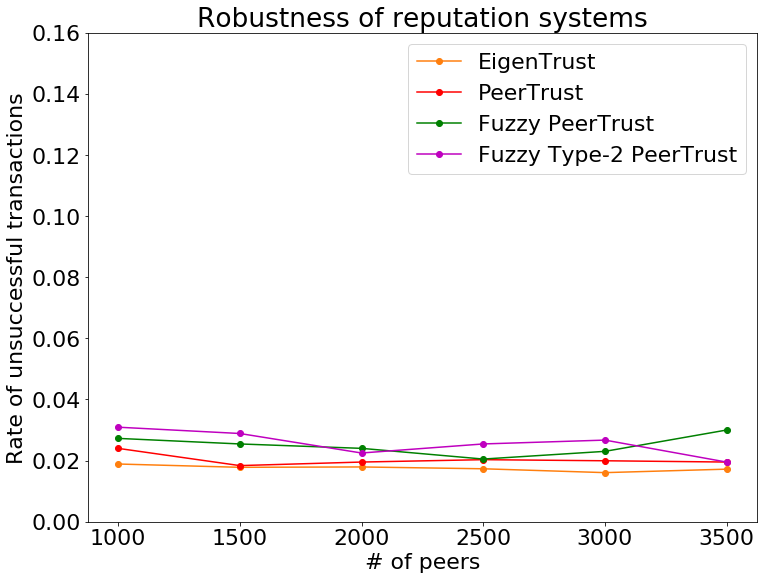

In [22]:
plot_robust_exp_2(res_dict)

In [74]:
rates = np.arange(0.1, 0.36, 0.025)
res_dict = malicious_rate_exp_2(rates)


Rate 0.100 completed!



Rate 0.125 completed!



Rate 0.150 completed!



Rate 0.175 completed!



Rate 0.200 completed!



Rate 0.225 completed!



Rate 0.250 completed!



Rate 0.275 completed!



Rate 0.300 completed!



Rate 0.325 completed!



Rate 0.350 completed!


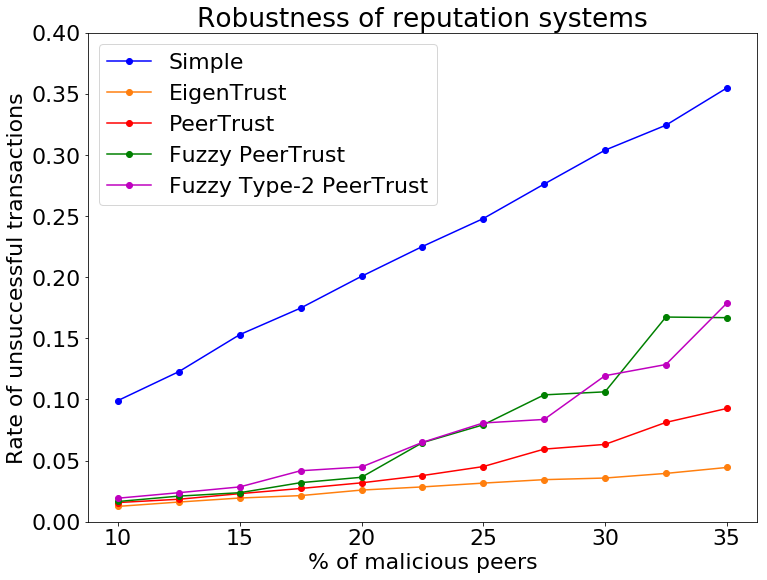

In [75]:
plot_malicious_rate_exp_2(res_dict)

In [31]:
res_dict['honest'] = []
for rate in rates:
    honest = HonestPeerEnv(num_peers=PEER_NUM, malicious_rate=rate, pre_trusted_rate=PRE_TRUSTED_RATE,
                               min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
    honest.simulate(SIM_NUM)
    res_dict['honest'].append(count_stat(honest.interactions))

In [47]:
res_dict['peer_fuzzy'] = []
for rate in rates:
    ls = []
    for i in range(5):
        peer_fuzzy = PeerTrustFuzzyEnv(num_peers=PEER_NUM, malicious_rate=rate,
                                   min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_fuzzy.simulate(SIM_NUM)
        ls.append(count_stat(peer_fuzzy.interactions))
    res_dict['peer_fuzzy'].append(np.mean(ls))
    print(f'{rate:.3f} completed!')


0.100 completed!



0.125 completed!



0.150 completed!



0.175 completed!



0.200 completed!



0.225 completed!



0.250 completed!



0.275 completed!



0.300 completed!



0.325 completed!



0.350 completed!


In [69]:
res_dict['abs'] = []
for rate in rates:
    ls = []
    for i in range(5):
        absolute = AbsoluteTrustEnv(num_peers=PEER_NUM, malicious_rate=rate,
                                   min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        absolute.simulate(SIM_NUM)
        ls.append(count_stat(absolute.interactions))
    res_dict['abs'].append(np.mean(ls))
    print(f'{rate:.3f} completed!')


0.100 completed!



0.125 completed!



0.150 completed!



0.175 completed!



0.200 completed!



0.225 completed!



0.250 completed!



0.275 completed!



0.300 completed!



0.325 completed!



0.350 completed!


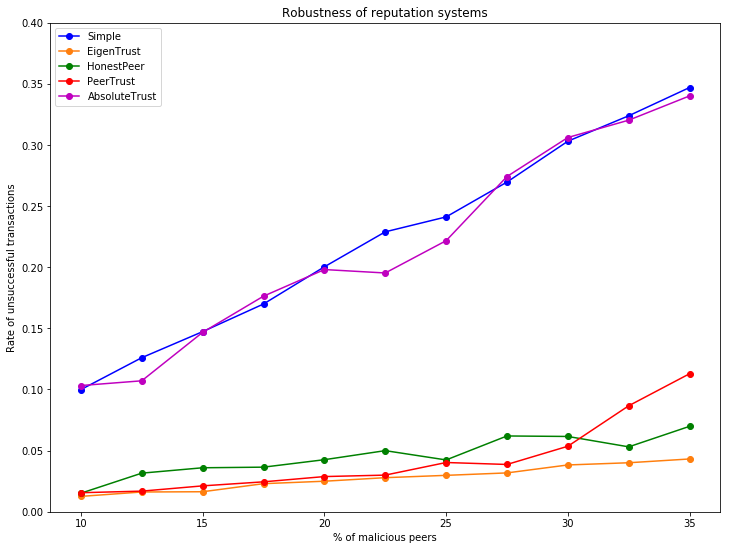

In [77]:
plot_malicious_rate_exp(res_dict)

In [15]:
nums = np.arange(1000, 3501, 500)
res_dict_conv = convergence_exp(nums)


[3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Num 1000 completed!



[3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[6, 6, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Num 1500 completed!



[3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7]
Num 2000 completed!



[3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[5, 6, 6, 6, 6, 6, 7, 6, 7, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 9, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 8, 8, 8, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8]
Num 2500 completed!



[3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Num 3000 completed!



[3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



[5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 9, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Num 3500 completed!


In [16]:
res_dict_conv['honest'] = []
for num in nums:
    honest = HonestPeerEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                               min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
    honest.simulate(SIM_NUM)
    res_dict_conv['honest'].append(np.mean(honest.convergence))
    print(honest.convergence)


[3, 4, 4, 4, 6, 6, 6, 7, 7, 9, 14, 11, 11, 11, 11, 10, 9, 9, 9, 9, 9, 188, 18, 24, 21, 19, 18, 16, 8, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



[3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 8, 10, 14, 10, 10, 10, 10, 10, 10, 12, 15, 16, 15, 14, 13, 12, 12, 11, 8, 7, 8, 8, 9, 10, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]



[4, 3, 3, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 9, 9, 9, 9, 8, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 8, 8, 8, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



[3, 3, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 12, 12, 12, 12, 13, 14, 14, 13, 12, 12, 12, 11, 9, 7, 7, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 10, 10, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 8, 7, 7, 8, 8, 8, 7, 7, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5]



[3, 3, 3, 3, 4, 3, 4, 4, 6, 26, 6, 6, 5, 31, 23, 9, 9, 6, 14, 5, 6, 6, 6, 9, 14, 7, 6, 6, 6, 8, 7, 8, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 8, 8, 6, 7, 8, 8, 8, 9, 9, 10, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]



[2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


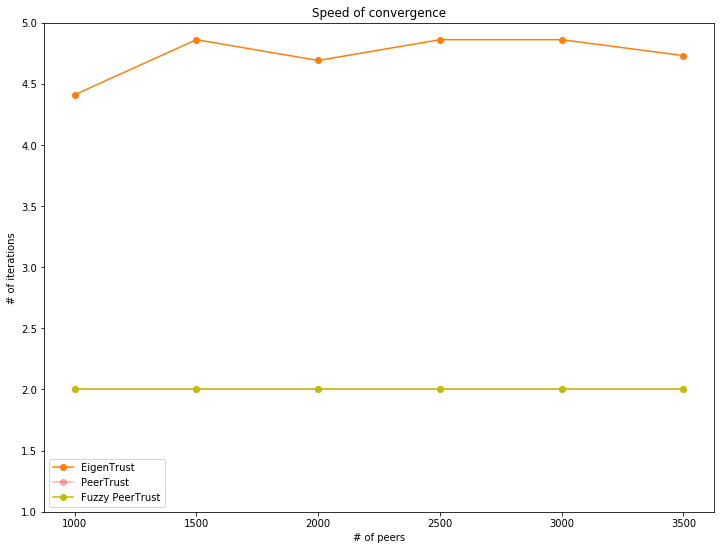

In [66]:
plot_convergence_exp(res_dict_conv)

In [24]:
nums = np.arange(1000, 3001, 500)
res_dict_rob = robustness_exp(nums)


Num 1000 completed!



Num 1500 completed!



Num 2000 completed!



Num 2500 completed!



Num 3000 completed!


In [25]:
res_dict_rob['honest'] = []
for num in nums:
    honest = HonestPeerEnv(num_peers=num, malicious_rate=RATE, pre_trusted_rate=PRE_TRUSTED_RATE,
                               min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
    honest.simulate(SIM_NUM)
    res_dict_rob['honest'].append(count_stat(honest.interactions))

In [48]:
res_dict_rob['peer_fuzzy'] = []
for num in nums:
    ls = []
    for i in range(5):
        peer_fuzzy = PeerTrustFuzzyEnv(num_peers=num, malicious_rate=RATE,
                                   min_cat_peer_rate=MIN_CAT_PEER_RATE, num_cats=CATS_NUM, trust_upd=TRUST_UPDATE)
        peer_fuzzy.simulate(SIM_NUM)
        ls.append(count_stat(peer_fuzzy.interactions))
    res_dict_rob['peer_fuzzy'].append(np.mean(ls))

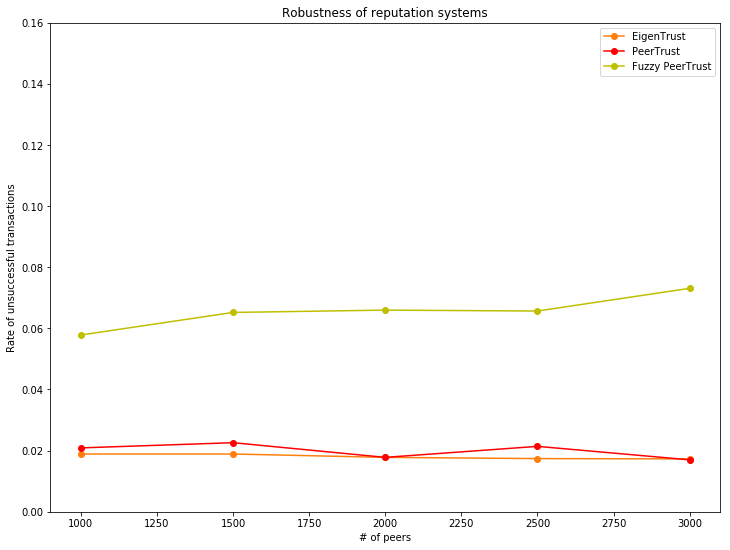

In [67]:
plot_robust_exp(res_dict_rob)